In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import cv2

from random import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.cluster import KMeans

from xgboost import XGBClassifier

At first we need to create the DataFrame, to do that the next 3 blocks will do the following actions on each image:
- read the image from the folder and label it according to its name
- resize the image and convert it to gray scale

In [50]:
def label_img(img):
    word_label = img.split('.')[0]
    if word_label == 'dog' : return 1
    elif word_label == 'cat' : return 0

# Gray Scaled Images

In [3]:
train_data = []
train_label = []
for img in os.listdir(r'C:\Users\guyit\Desktop\train'):
    label = label_img(img)
    path = os.path.join(r'C:\Users\guyit\Desktop\train',img)
    img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(28,28))
    train_data.append(np.array(img).flatten())
    train_label.append(label)

In [4]:
cols = []
for i in range(784):
    cols.append("pixel_"+str(i))
df = pd.DataFrame(train_data,columns=cols)
df['label']=train_label
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,173,187,197,204,209,215,184,165,143,96,...,28,4,9,34,28,9,2,3,3,0
1,36,44,41,40,41,53,67,64,62,73,...,62,26,33,71,53,87,57,52,42,0
2,56,58,62,61,56,50,48,43,48,56,...,106,147,63,76,68,72,131,145,172,0
3,222,236,226,228,231,223,231,224,216,208,...,159,178,255,251,237,223,208,209,212,0
4,99,82,145,198,222,237,202,236,85,136,...,92,97,92,86,86,85,76,85,79,0


Now that we have the data we i will shuffle it and split it to test and train dataframes.

In [5]:
df_suffled = df.sample(frac=1,random_state=0)
df_suffled

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
14149,55,47,72,98,137,72,68,155,133,159,...,126,192,179,151,179,101,128,152,109,1
8946,65,60,60,58,58,47,50,54,42,43,...,57,45,23,45,44,61,64,27,36,0
22378,185,206,207,211,210,159,199,195,166,190,...,46,51,57,53,46,41,50,36,23,1
12162,36,140,142,142,140,132,151,56,61,80,...,138,72,48,80,37,60,44,66,70,0
4879,133,146,141,120,138,134,141,123,125,118,...,126,95,76,46,64,75,103,89,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,85,73,77,72,100,43,42,49,44,53,...,84,123,196,70,69,63,52,49,53,1
19648,131,166,138,124,142,126,130,134,132,138,...,122,118,108,140,137,122,91,95,128,1
9845,123,127,126,128,129,130,132,132,130,129,...,107,106,104,96,94,106,57,84,51,0
10799,52,42,40,44,48,53,57,65,73,86,...,25,31,41,32,29,52,69,152,156,0


In [6]:
test = df_suffled.iloc[:5000]
test.reset_index(drop=True,inplace=True)
test.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,55,47,72,98,137,72,68,155,133,159,...,126,192,179,151,179,101,128,152,109,1
1,65,60,60,58,58,47,50,54,42,43,...,57,45,23,45,44,61,64,27,36,0
2,185,206,207,211,210,159,199,195,166,190,...,46,51,57,53,46,41,50,36,23,1
3,36,140,142,142,140,132,151,56,61,80,...,138,72,48,80,37,60,44,66,70,0
4,133,146,141,120,138,134,141,123,125,118,...,126,95,76,46,64,75,103,89,100,0


In [7]:
train = df_suffled.iloc[5000:]
train.reset_index(drop=True,inplace=True)
train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,218,211,212,174,162,138,158,167,148,167,...,183,193,190,193,193,192,191,194,194,0
1,77,98,59,14,66,105,92,111,143,12,...,99,163,196,179,186,76,102,24,66,1
2,90,93,88,80,79,61,50,42,31,38,...,89,84,85,120,146,149,141,80,74,1
3,149,130,149,144,118,144,127,131,136,142,...,196,191,207,201,204,204,190,198,193,1
4,1,1,1,1,13,1,1,1,1,4,...,1,1,1,1,1,1,1,1,1,1


In [8]:
train_data = train.drop('label',axis=1)
train_target = train['label']

In [9]:
test_data = test.drop('label',axis=1)
test_target = test['label']

the labels are:
- 0 cat
- 1 dog

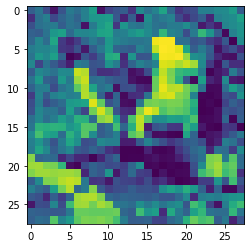

In [56]:
plt.imshow(np.array(train_data.loc[1]).reshape(28,28))

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 785 entries, pixel_0 to label
dtypes: int64(785)
memory usage: 149.7 MB


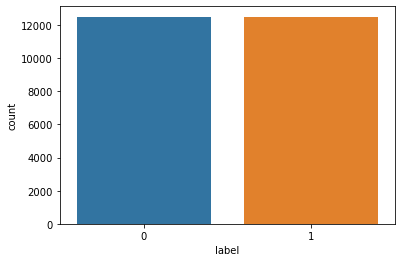

In [27]:
sns.countplot(df['label'])

Using a Random Forest Classifier i will plot the each pixel importance.
Note: the code in the next 3 blocks is taken from "Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow" github:
 https://github.com/ageron/handson-ml2

In [30]:
rfc = RandomForestClassifier()
rfc.fit(train_data,train_target)

RandomForestClassifier()

In [31]:
rfc.feature_importances_

array([0.00102908, 0.00101087, 0.00100481, 0.00106001, 0.00094802,
       0.00098764, 0.00107365, 0.00099128, 0.00112334, 0.00106552,
       0.00113178, 0.00100118, 0.00107346, 0.00105109, 0.00103453,
       0.00093218, 0.00098105, 0.00107452, 0.0010987 , 0.00091831,
       0.00108111, 0.00085721, 0.00112843, 0.00115178, 0.00093942,
       0.00101906, 0.0010446 , 0.00101066, 0.00125167, 0.00108123,
       0.00103013, 0.00099994, 0.00105619, 0.00105582, 0.00108022,
       0.00114558, 0.00098487, 0.00111342, 0.00101656, 0.0011678 ,
       0.00103803, 0.00102527, 0.00114931, 0.00100731, 0.00087724,
       0.00106293, 0.00100045, 0.00111881, 0.00105222, 0.00114584,
       0.00103821, 0.00107881, 0.00091194, 0.00107569, 0.00100201,
       0.00102796, 0.00107997, 0.001093  , 0.00106179, 0.00092164,
       0.00095051, 0.00115433, 0.00102959, 0.00113205, 0.00103514,
       0.00118349, 0.0012036 , 0.00100046, 0.0012218 , 0.00119594,
       0.00100282, 0.00123261, 0.00102704, 0.0010955 , 0.00113

In [32]:
def plot_instance(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = plt.cm.hot,
               interpolation="nearest")
    plt.axis("off")

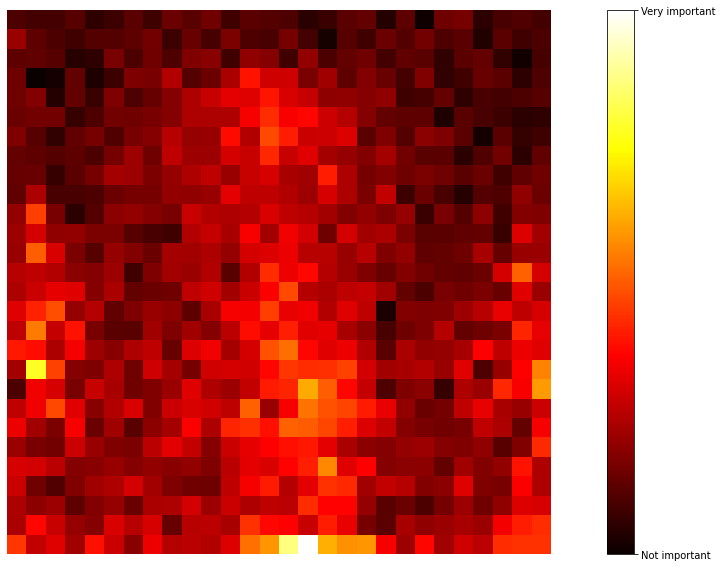

In [33]:
plt.figure(figsize=(20, 10))
plot_instance(rfc.feature_importances_)
cbar = plt.colorbar(ticks=[rfc.feature_importances_.min(), rfc.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

At first will scale the data using 'StandardScaler' and create a simple Ramdom Forest model to get some proportions.

In [34]:
sc= StandardScaler()
scaled_train = sc.fit_transform(train_data)
scaled_test = sc.transform(test_data)

In [35]:
rfc = RandomForestClassifier()
rfc.fit(scaled_train,train_target)
rfc

RandomForestClassifier()

In [36]:
y_pred = rfc.predict(scaled_test)

In [37]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.67      0.64      2496
           1       0.64      0.60      0.62      2504

    accuracy                           0.63      5000
   macro avg       0.63      0.63      0.63      5000
weighted avg       0.63      0.63      0.63      5000



In [39]:
metrics.accuracy_score(test_target,y_pred)

0.6318

Text(33.0, 0.5, 'Actual')

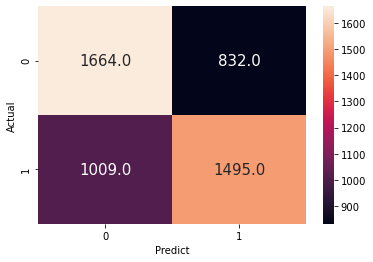

In [40]:
cm = confusion_matrix(test_target,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

To try and improve my model i will double the number of my train instances by fliping the images.

In [10]:
train_data_fliped = []
train_label_fliped = []
for img in os.listdir(r'C:\Users\guyit\Desktop\train'):
    label = label_img(img)
    path = os.path.join(r'C:\Users\guyit\Desktop\train',img)
    img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(28,28))
    img = cv2.flip(img,1)
    train_data_fliped.append(np.array(img).flatten())
    train_label_fliped.append(label)

In [11]:
cols = []
for i in range(784):
    cols.append("pixel_"+str(i))
df_fliped = pd.DataFrame(train_data_fliped,columns=cols)
df_fliped['label']=train_label_fliped
df_fliped.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,211,222,227,228,226,224,223,222,222,222,...,45,46,47,48,51,53,127,135,128,0
1,162,103,82,99,91,104,87,93,101,131,...,94,35,36,20,21,20,20,22,18,0
2,155,148,158,154,155,154,146,156,144,156,...,65,99,178,189,199,143,117,151,153,0
3,242,236,240,220,227,210,208,226,227,225,...,96,98,93,98,114,129,151,207,208,0
4,75,51,13,35,102,160,165,174,78,96,...,117,64,85,141,81,81,72,60,56,0


In [12]:
df_fliped_shuffled = df_fliped.sample(frac=1,random_state=0)
df_fliped_shuffled.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
14149,87,122,99,87,92,101,37,31,68,94,...,152,157,168,155,133,168,165,79,129,1
8946,89,115,116,104,120,170,253,241,204,126,...,222,222,222,222,221,221,221,221,221,0
22378,232,252,212,205,251,192,246,224,252,225,...,53,52,52,52,50,44,44,41,50,1
12162,95,146,98,144,145,105,142,150,66,93,...,47,45,55,51,65,77,54,64,84,0
4879,92,92,85,86,92,88,132,140,103,102,...,137,138,131,111,108,105,94,87,117,0


In [13]:
train_fliped = df_fliped_shuffled.iloc[5000:]
train_fliped.reset_index(drop=True,inplace=True)
train_fliped.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,134,124,124,126,125,109,111,106,74,98,...,174,164,160,159,172,158,147,150,148,0
1,74,141,123,120,110,110,60,54,39,85,...,202,204,191,137,115,188,87,91,77,1
2,39,43,42,43,45,44,41,41,36,37,...,85,77,80,90,83,89,84,85,78,1
3,45,111,104,144,82,92,100,105,108,109,...,186,127,153,133,187,175,128,186,174,1
4,1,1,1,1,1,1,1,1,1,1,...,80,55,42,42,0,1,1,1,1,1


In [14]:
train_fliped_data = train_fliped.drop('label',axis=1)
train_fliped_target = train_fliped['label']

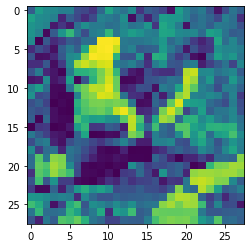

In [62]:
plt.imshow(np.array(train_fliped_data.loc[1]).reshape(28,28))

In [15]:
full_train_data = pd.concat([train_data,train_fliped_data])
full_train_target = pd.concat([train_target,train_fliped_target])

Now that i doubled the number of instances i will try the RandomForestClassifier again.

In [16]:
sc= StandardScaler()
scaled_train = sc.fit_transform(full_train_data)
scaled_test = sc.transform(test_data)

In [65]:
rfc = RandomForestClassifier()
rfc.fit(scaled_train,full_train_target)
rfc

RandomForestClassifier()

In [66]:
y_pred = rfc.predict(scaled_test)

In [67]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.67      0.65      2496
           1       0.65      0.62      0.64      2504

    accuracy                           0.64      5000
   macro avg       0.65      0.64      0.64      5000
weighted avg       0.65      0.64      0.64      5000



In [68]:
metrics.accuracy_score(test_target,y_pred)

0.6448

Text(33.0, 0.5, 'Actual')

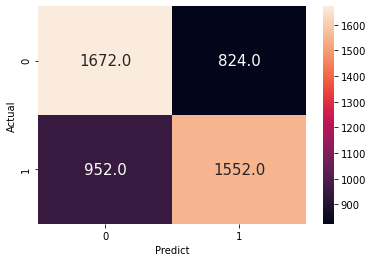

In [69]:
cm = confusion_matrix(test_target,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

The accuracy improved by 1.3% thanks to new examples.

In [70]:
xg = XGBClassifier(use_label_encoder=False,eval_metric = 'mlogloss')
xg.fit(scaled_train,full_train_target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [71]:
y_pred = xg.predict(scaled_test)

In [72]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.67      0.68      2496
           1       0.68      0.69      0.68      2504

    accuracy                           0.68      5000
   macro avg       0.68      0.68      0.68      5000
weighted avg       0.68      0.68      0.68      5000



In [73]:
metrics.accuracy_score(test_target,y_pred)

0.6798

Text(33.0, 0.5, 'Actual')

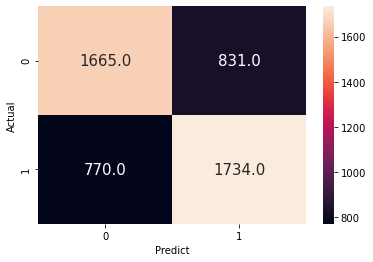

In [74]:
cm = confusion_matrix(test_target,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

The XGBClassifier is even better, i will use VotingClassifier to combine them.

In [77]:
xg = XGBClassifier(use_label_encoder=False,eval_metric = 'mlogloss')
rfc = RandomForestClassifier()
vot = VotingClassifier(estimators=[('xg',xg),('rfc',rfc)],voting='soft')
vot.fit(scaled_train,full_train_target)

VotingClassifier(estimators=[('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            eval_metric='mlogloss', gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
             

In [78]:
y_pred = vot.predict(scaled_test)

In [79]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.68      0.68      2496
           1       0.68      0.70      0.69      2504

    accuracy                           0.69      5000
   macro avg       0.69      0.69      0.69      5000
weighted avg       0.69      0.69      0.69      5000



In [80]:
metrics.accuracy_score(test_target,y_pred)

0.6866

Text(33.0, 0.5, 'Actual')

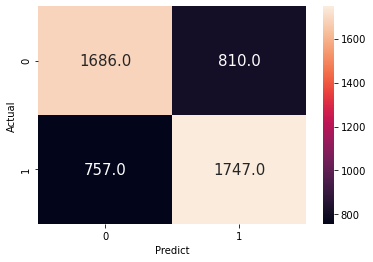

In [81]:
cm = confusion_matrix(test_target,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

The VotingClassifier did well.

Now i will use KMeans to cluster the data and then i will use it as a new column. then i will check the Voting classifier on the new data.

In [69]:
km = KMeans(n_clusters = 2, random_state=0)
km.fit(full_train_data)
y_labels_train = km.labels_
y_labels_test = km.predict(test_data)

In [70]:
full_train_data_km = full_train_data.copy()
full_train_data_km['KMeans'] = y_labels_train
full_train_data_km.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,KMeans
0,218,211,212,174,162,138,158,167,148,167,...,183,193,190,193,193,192,191,194,194,1
1,77,98,59,14,66,105,92,111,143,12,...,99,163,196,179,186,76,102,24,66,0
2,90,93,88,80,79,61,50,42,31,38,...,89,84,85,120,146,149,141,80,74,0
3,149,130,149,144,118,144,127,131,136,142,...,196,191,207,201,204,204,190,198,193,1
4,1,1,1,1,13,1,1,1,1,4,...,1,1,1,1,1,1,1,1,1,0


In [71]:
test_data_km = test_data.copy()
test_data_km['KMeans'] = y_labels_test

In [72]:
xg = XGBClassifier(use_label_encoder=False,eval_metric = 'mlogloss')
rfc = RandomForestClassifier()
pipe_rfc = Pipeline(steps=[('sc',sc), ('rfc', rfc)])
pipe_xg =  Pipeline(steps=[('sc',sc), ('xg', xg)])
vot = VotingClassifier(estimators=[('xg',pipe_xg),('rfc',pipe_rfc)],voting='soft')
vot.fit(full_train_data_km,full_train_target)

VotingClassifier(estimators=[('xg',
                              Pipeline(steps=[('sc', StandardScaler()),
                                              ('xg',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             eval_metric='mlogloss',
                                                             gamma=None,
                                                             gpu_id=None,
                                                             importance_type='gain',
                                                             interaction_constraints=None,
                         

In [73]:
y_pred = vot.predict(test_data_km)

In [74]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.68      0.68      2496
           1       0.68      0.69      0.69      2504

    accuracy                           0.69      5000
   macro avg       0.69      0.68      0.68      5000
weighted avg       0.69      0.69      0.68      5000



In [75]:
metrics.accuracy_score(test_target,y_pred)

0.685

Text(33.0, 0.5, 'Actual')

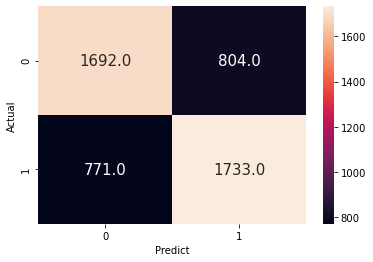

In [76]:
cm = confusion_matrix(test_target,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

the new feature didnt help us.

### PCA
to reduce the number of features in the data i will use PCA

In [84]:
#the code in the next 2 blocks is taken from "Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow" github:
#https://github.com/ageron/handson-ml2
pca = PCA()
pca.fit(scaled_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.9) + 1

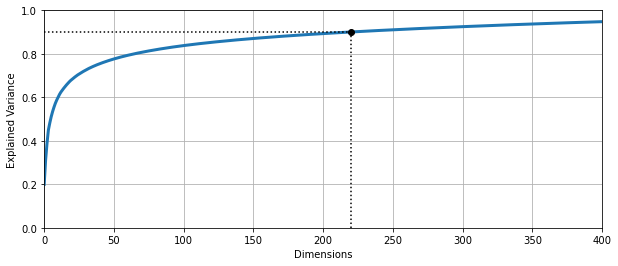

In [85]:
plt.figure(figsize=(10,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.9], "k:")
plt.plot([0, d], [0.9, 0.9], "k:")
plt.plot(d, 0.9, "ko")
plt.grid(True)
plt.show()

### Hyperparameter Tuning

In [17]:
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
xg = XGBClassifier(use_label_encoder=False,eval_metric = 'mlogloss')
pca = PCA(n_components=0.9)

In [18]:
redueced_train = pca.fit_transform(scaled_train)
redueced_train.shape

(40000, 220)

In [19]:
redueced_test = pca.transform(scaled_test)
redueced_test.shape

(5000, 220)

In [89]:
pipe_knn = Pipeline(steps=[('sc',sc),('pca', pca), ('knn', knn)])
pipe_dtc = Pipeline(steps=[('sc',sc),('pca', pca), ('dtc', dtc)])
pipe_rfc = Pipeline(steps=[('sc',sc),('pca', pca), ('rfc', rfc)])
pipe_xg = Pipeline(steps=[('sc',sc),('pca', pca), ('xg', xg)])

In [90]:
param_knn = {
    'knn__n_neighbors': list(range(2,11,2)),
    'knn__weights': ['uniform','distance']  
}

In [92]:
path = dtc.cost_complexity_pruning_path(redueced_train,full_train_target)
alphas = path.ccp_alphas
param_dtc = {'dtc__ccp_alpha':alphas}

In [93]:
param_rfc = {'rfc__n_estimators':[100,200,300,400,500],
    'rfc__max_depth' : list(range(2,21,2))}

In [109]:
param_xg = {'xg__n_estimators':[100,200,300,400,500],
    'xg__learning_rate' : np.linspace(0.3,1,8)}

In [110]:
grid_knn = RandomizedSearchCV(pipe_knn,param_knn,scoring='accuracy')
grid_dtc = RandomizedSearchCV(pipe_dtc,param_dtc,scoring='accuracy')
grid_rfc = RandomizedSearchCV(pipe_rfc,param_rfc,scoring='accuracy')
grid_xg = RandomizedSearchCV(pipe_xg,param_xg,scoring='accuracy')

In [96]:
grid_knn.fit(full_train_data,full_train_target)

RandomizedSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()),
                                             ('pca', PCA(n_components=0.9)),
                                             ('knn', KNeighborsClassifier())]),
                   param_distributions={'knn__n_neighbors': [2, 4, 6, 8, 10],
                                        'knn__weights': ['uniform',
                                                         'distance']},
                   scoring='accuracy')

In [97]:
grid_dtc.fit(full_train_data,full_train_target)

RandomizedSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()),
                                             ('pca', PCA(n_components=0.9)),
                                             ('dtc',
                                              DecisionTreeClassifier())]),
                   param_distributions={'dtc__ccp_alpha': array([0.00000000e+00, 2.47863248e-05, 2.47881356e-05, ...,
       3.10367540e-03, 4.22521443e-03, 6.48858291e-03])},
                   scoring='accuracy')

In [98]:
grid_rfc.fit(full_train_data,full_train_target)

RandomizedSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()),
                                             ('pca', PCA(n_components=0.9)),
                                             ('rfc',
                                              RandomForestClassifier())]),
                   param_distributions={'rfc__max_depth': [2, 4, 6, 8, 10, 12,
                                                           14, 16, 18, 20],
                                        'rfc__n_estimators': [100, 200, 300,
                                                              400, 500]},
                   scoring='accuracy')

In [111]:
grid_xg.fit(full_train_data,full_train_target)

RandomizedSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()),
                                             ('pca', PCA(n_components=0.9)),
                                             ('xg',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            eval_metric='mlogloss',
                                                            gamma=None,
                                                            gpu_id=None,
                                                            importance_type='gain',
                                                            interaction_constraints=No

In [99]:
print(grid_knn.best_params_)
print(grid_knn.best_score_)

{'knn__weights': 'distance', 'knn__n_neighbors': 10}
0.605725


In [100]:
print(grid_dtc.best_params_)
print(grid_dtc.best_score_)

{'dtc__ccp_alpha': 0.0002}
0.611


In [101]:
print(grid_rfc.best_params_)
print(grid_rfc.best_score_)

{'rfc__n_estimators': 400, 'rfc__max_depth': 14}
0.6604249999999999


In [112]:
print(grid_xg.best_params_)
print(grid_xg.best_score_)

{'xg__n_estimators': 500, 'xg__learning_rate': 0.6}
0.6979249999999999


i will combine the models above using Voting and Stacking classifiers.

In [20]:
knn = KNeighborsClassifier(n_neighbors=10,weights='distance')
dtc = DecisionTreeClassifier(ccp_alpha= 0.0002)
rfc = RandomForestClassifier(n_estimators=400,max_depth=14)
xg = XGBClassifier(use_label_encoder=False,eval_metric = 'mlogloss',n_estimators=500,learning_rate=0.6)
pipe_rfc = Pipeline(steps=[('sc',sc),('pca', pca), ('rfc', rfc)])
pipe_knn = Pipeline(steps=[('sc',sc),('pca', pca), ('knn', knn)])
pipe_dtc = Pipeline(steps=[('sc',sc),('pca', pca), ('dtc', dtc)])
pipe_xg =  Pipeline(steps=[('sc',sc),('pca', pca), ('xg', xg)])

In [125]:
vot = VotingClassifier(estimators=[('dtc', pipe_dtc), ('knn', pipe_knn), ('rfc', pipe_rfc), ('xg', pipe_xg)],
voting='soft')

In [127]:
vot.fit(full_train_data,full_train_target)

VotingClassifier(estimators=[('dtc',
                              Pipeline(steps=[('sc', StandardScaler()),
                                              ('pca', PCA(n_components=0.9)),
                                              ('dtc',
                                               DecisionTreeClassifier(ccp_alpha=0.0002))])),
                             ('knn',
                              Pipeline(steps=[('sc', StandardScaler()),
                                              ('pca', PCA(n_components=0.9)),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=10,
                                                                    weights='distance'))])),
                             ('rfc',
                              Pipeline(steps=[('sc', StandardScaler()),
                                              (...
                                                             learning_rate=0.6,
        

In [128]:
y_pred = vot.predict(test_data)

In [130]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      2496
           1       0.64      0.62      0.63      2504

    accuracy                           0.64      5000
   macro avg       0.64      0.64      0.64      5000
weighted avg       0.64      0.64      0.64      5000



In [129]:
metrics.accuracy_score(test_target,y_pred)

0.6368

In [21]:
vot2 = VotingClassifier(estimators=[('xg',pipe_xg), ('rfc', pipe_rfc)],
voting='soft')

In [138]:
vot2.fit(full_train_data,full_train_target)

VotingClassifier(estimators=[('xg',
                              Pipeline(steps=[('sc', StandardScaler()),
                                              ('pca', PCA(n_components=0.9)),
                                              ('xg',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             eval_metric='mlogloss',
                                                             gamma=None,
                                                             gpu_id=None,
                                                             importance_type='gain',
                                      

In [139]:
y_pred = vot2.predict(test_data)

In [140]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66      2496
           1       0.66      0.65      0.66      2504

    accuracy                           0.66      5000
   macro avg       0.66      0.66      0.66      5000
weighted avg       0.66      0.66      0.66      5000



In [141]:
metrics.accuracy_score(test_target,y_pred)

0.6604

In [77]:
stc = StackingClassifier(estimators=[('dtc', pipe_dtc), ('knn', pipe_knn), ('rfc', pipe_rfc), ('xg', pipe_xg)])

In [143]:
stc.fit(full_train_data,full_train_target)

StackingClassifier(estimators=[('dtc',
                                Pipeline(steps=[('sc', StandardScaler()),
                                                ('pca', PCA(n_components=0.9)),
                                                ('dtc',
                                                 DecisionTreeClassifier(ccp_alpha=0.0002))])),
                               ('knn',
                                Pipeline(steps=[('sc', StandardScaler()),
                                                ('pca', PCA(n_components=0.9)),
                                                ('knn',
                                                 KNeighborsClassifier(n_neighbors=10,
                                                                      weights='distance'))])),
                               ('rfc',
                                Pipeline(steps=[('sc', StandardScaler())...
                                                               interaction_constraints=None,
                  

In [144]:
y_pred = stc.predict(test_data)

In [145]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      2496
           1       0.67      0.67      0.67      2504

    accuracy                           0.67      5000
   macro avg       0.67      0.67      0.67      5000
weighted avg       0.67      0.67      0.67      5000



In [146]:
metrics.accuracy_score(test_target,y_pred)

0.667

In [149]:
stc2 = StackingClassifier(estimators=[('xg', pipe_xg), ('rfc', pipe_rfc)])

In [150]:
stc2.fit(full_train_data,full_train_target)

StackingClassifier(estimators=[('xg',
                                Pipeline(steps=[('sc', StandardScaler()),
                                                ('pca', PCA(n_components=0.9)),
                                                ('xg',
                                                 XGBClassifier(base_score=None,
                                                               booster=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               eval_metric='mlogloss',
                                                               gamma=None,
                                                               gpu_id=None,
                                                               importance_type='gain',
            

In [151]:
y_pred = stc2.predict(test_data)

In [152]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66      2496
           1       0.67      0.66      0.66      2504

    accuracy                           0.66      5000
   macro avg       0.66      0.66      0.66      5000
weighted avg       0.66      0.66      0.66      5000



In [153]:
metrics.accuracy_score(test_target,y_pred)

0.6628

The 'stc' is the best from the above models. now i will try 'vot2' and 'stc' on the data with the 'KMeans' feature.

In [53]:
vot2.fit(full_train_data_km,full_train_target)

VotingClassifier(estimators=[('xg',
                              Pipeline(steps=[('sc', StandardScaler()),
                                              ('pca', PCA(n_components=0.9)),
                                              ('xg',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             eval_metric='mlogloss',
                                                             gamma=None,
                                                             gpu_id=None,
                                                             importance_type='gain',
                                      

In [54]:
y_pred = vot2.predict(test_data_km)

In [55]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      2496
           1       0.67      0.67      0.67      2504

    accuracy                           0.67      5000
   macro avg       0.67      0.67      0.67      5000
weighted avg       0.67      0.67      0.67      5000



In [56]:
metrics.accuracy_score(test_target,y_pred)

0.6668

In [78]:
stc.fit(full_train_data_km,full_train_target)

StackingClassifier(estimators=[('dtc',
                                Pipeline(steps=[('sc', StandardScaler()),
                                                ('pca', PCA(n_components=0.9)),
                                                ('dtc',
                                                 DecisionTreeClassifier(ccp_alpha=0.0002))])),
                               ('knn',
                                Pipeline(steps=[('sc', StandardScaler()),
                                                ('pca', PCA(n_components=0.9)),
                                                ('knn',
                                                 KNeighborsClassifier(n_neighbors=10,
                                                                      weights='distance'))])),
                               ('rfc',
                                Pipeline(steps=[('sc', StandardScaler())...
                                                               interaction_constraints=None,
                  

In [79]:
y_pred = stc.predict(test_data_km)

In [80]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67      2496
           1       0.67      0.68      0.67      2504

    accuracy                           0.67      5000
   macro avg       0.67      0.67      0.67      5000
weighted avg       0.67      0.67      0.67      5000



In [81]:
metrics.accuracy_score(test_target,y_pred)

0.6692

the  KMeans feature helped to improve the scores slightly

# Colored Images

Now instead of using gray scale i will use color images and repeat the same actions i did so far.

In [57]:
train_data_color = []
train_label_color = []
for img in os.listdir(r'C:\Users\anitay\Desktop\Ors folder\train'):
    label = label_img(img)
    path = os.path.join(r'C:\Users\anitay\Desktop\Ors folder\train',img)
    img = cv2.resize(cv2.imread(path),(28,28))
    train_data_color.append(np.array(img).flatten())
    train_label_color.append(label)

In [58]:
cols = []
for i in range(2352):
    cols.append("pixel_"+str(i))
df_color = pd.DataFrame(train_data_color,columns=cols)
df_color['label']=train_label_color
df_color.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_2343,pixel_2344,pixel_2345,pixel_2346,pixel_2347,pixel_2348,pixel_2349,pixel_2350,pixel_2351,label
0,93,170,209,105,183,226,115,193,236,121,...,0,3,2,0,4,3,0,4,3,0
1,40,36,33,44,47,39,43,44,35,44,...,50,52,70,40,48,65,33,38,53,0
2,65,59,49,66,60,51,70,64,55,68,...,115,131,138,54,156,158,1,194,194,0
3,219,224,222,235,236,236,224,226,226,226,...,202,210,207,207,209,209,208,212,213,0
4,60,95,121,40,79,104,100,143,167,155,...,48,75,89,60,83,98,50,79,90,0


In [59]:
df_color_suffled = df_color.sample(frac=1,random_state=0)
df_color_suffled

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_2343,pixel_2344,pixel_2345,pixel_2346,pixel_2347,pixel_2348,pixel_2349,pixel_2350,pixel_2351,label
14149,21,73,30,15,60,33,25,86,64,54,...,106,148,98,113,174,125,62,130,85,1
8946,5,52,116,1,45,113,0,45,113,5,...,64,62,67,31,27,27,36,37,35,0
22378,184,183,189,206,206,206,207,207,207,213,...,45,51,49,31,37,32,18,24,22,1
12162,25,33,46,106,135,164,105,136,167,108,...,51,38,53,68,61,73,96,61,76,0
4879,112,128,151,119,142,164,114,137,159,93,...,45,91,149,26,80,131,32,90,146,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,80,89,79,80,73,70,85,78,71,74,...,30,64,37,22,64,31,33,65,35,1
19648,134,128,137,168,163,172,139,136,142,122,...,76,91,96,79,95,101,117,126,136,1
9845,114,119,134,118,123,138,117,122,137,117,...,52,54,65,82,81,91,49,48,58,0
10799,43,54,52,33,44,42,32,41,40,35,...,76,68,69,156,153,149,163,156,153,0


In [60]:
test = df_color_suffled.iloc[:5000]
test.reset_index(drop=True,inplace=True)
test.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_2343,pixel_2344,pixel_2345,pixel_2346,pixel_2347,pixel_2348,pixel_2349,pixel_2350,pixel_2351,label
0,21,73,30,15,60,33,25,86,64,54,...,106,148,98,113,174,125,62,130,85,1
1,5,52,116,1,45,113,0,45,113,5,...,64,62,67,31,27,27,36,37,35,0
2,184,183,189,206,206,206,207,207,207,213,...,45,51,49,31,37,32,18,24,22,1
3,25,33,46,106,135,164,105,136,167,108,...,51,38,53,68,61,73,96,61,76,0
4,112,128,151,119,142,164,114,137,159,93,...,45,91,149,26,80,131,32,90,146,0


In [61]:
train = df_color_suffled.iloc[5000:]
train.reset_index(drop=True,inplace=True)
train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_2343,pixel_2344,pixel_2345,pixel_2346,pixel_2347,pixel_2348,pixel_2349,pixel_2350,pixel_2351,label
0,222,231,191,211,223,186,208,224,190,150,...,202,208,155,205,210,160,205,209,160,0
1,55,80,77,63,104,97,27,58,72,6,...,70,98,123,6,21,35,29,57,98,1
2,115,93,76,117,95,79,109,90,76,99,...,123,138,153,50,70,111,62,68,90,1
3,137,149,155,119,130,136,137,147,157,132,...,186,189,194,193,197,203,189,192,197,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [62]:
train_data = train.drop('label',axis=1)
train_target = train['label']

In [63]:
test_data = test.drop('label',axis=1)
test_target = test['label']

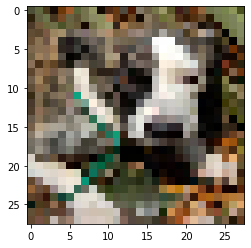

In [64]:
plt.imshow(np.flip(np.array(train_data.loc[1]).reshape(28,28,3),2))

In [65]:
train_data_color_fliped = []
train_label_color_fliped = []
for img in os.listdir(r'C:\Users\anitay\Desktop\Ors folder\train'):
    label = label_img(img)
    path = os.path.join(r'C:\Users\anitay\Desktop\Ors folder\train',img)
    img = cv2.resize(cv2.imread(path),(28,28))
    img = cv2.flip(img,1)
    train_data_color_fliped.append(np.array(img).flatten())
    train_label_color_fliped.append(label)

In [67]:
cols = []
for i in range(2352):
    cols.append("pixel_"+str(i))
df_color_fliped = pd.DataFrame(train_data_color_fliped,columns=cols)
df_color_fliped['label']=train_label_color_fliped
df_color_fliped.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_2343,pixel_2344,pixel_2345,pixel_2346,pixel_2347,pixel_2348,pixel_2349,pixel_2350,pixel_2351,label
0,129,209,247,149,221,251,158,228,250,157,...,56,126,156,61,132,169,55,126,160,0
1,152,162,165,127,103,95,106,82,74,126,...,18,20,21,21,22,23,18,17,19,0
2,160,166,133,155,158,126,166,168,136,166,...,89,116,130,118,150,165,114,153,167,0
3,247,242,241,238,236,235,238,241,239,211,...,113,131,206,201,207,209,206,210,203,0
4,39,62,115,23,38,91,2,15,21,10,...,49,71,83,42,59,68,44,55,63,0


In [68]:
df_color_fliped_shuffled = df_color_fliped.sample(frac=1,random_state=0)
df_color_fliped_shuffled.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_2343,pixel_2344,pixel_2345,pixel_2346,pixel_2347,pixel_2348,pixel_2349,pixel_2350,pixel_2351,label
14149,51,106,65,63,142,103,34,124,75,63,...,127,184,141,40,96,62,65,153,103,1
8946,121,99,56,142,126,83,150,127,81,137,...,210,220,227,210,220,227,210,221,225,0
22378,238,230,231,254,252,251,213,213,209,215,...,40,46,41,37,43,38,41,53,47,1
12162,74,92,111,117,143,162,68,94,118,115,...,45,49,67,52,59,78,63,80,101,0
4879,67,92,102,67,90,106,60,81,103,61,...,28,80,147,23,72,142,51,103,169,0


In [69]:
train_fliped = df_color_fliped_shuffled.iloc[5000:]
train_fliped.reset_index(drop=True,inplace=True)
train_fliped.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_2343,pixel_2344,pixel_2345,pixel_2346,pixel_2347,pixel_2348,pixel_2349,pixel_2350,pixel_2351,label
0,119,141,127,106,130,118,106,130,118,108,...,174,168,95,177,173,95,175,171,92,0
1,30,81,75,89,151,142,77,133,120,87,...,53,83,107,68,82,119,50,72,99,1
2,37,41,36,41,45,40,40,44,39,41,...,63,85,91,64,86,91,57,79,84,1
3,29,44,53,76,110,126,122,108,89,160,...,119,125,135,163,187,193,149,177,177,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [70]:
train_fliped_data = train_fliped.drop('label',axis=1)
train_fliped_target = train_fliped['label']

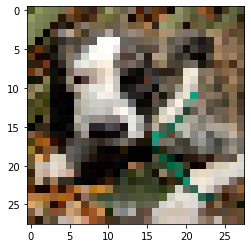

In [71]:
plt.imshow(np.flip(np.array(train_fliped_data.loc[1]).reshape(28,28,3),2))

In [72]:
full_train_data = pd.concat([train_data,train_fliped_data])
full_train_target = pd.concat([train_target,train_fliped_target])

In [73]:
sc= StandardScaler()
scaled_train = sc.fit_transform(full_train_data)
scaled_test = sc.transform(test_data)

In [74]:
rfc = RandomForestClassifier()
rfc.fit(scaled_train,full_train_target)
rfc

RandomForestClassifier()

In [75]:
y_pred = rfc.predict(scaled_test)

In [76]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67      2496
           1       0.67      0.61      0.64      2504

    accuracy                           0.66      5000
   macro avg       0.66      0.66      0.66      5000
weighted avg       0.66      0.66      0.66      5000



In [77]:
metrics.accuracy_score(test_target,y_pred)

0.656

Text(33.0, 0.5, 'Actual')

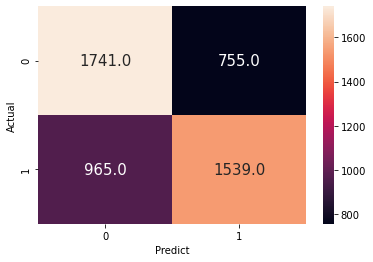

In [78]:
cm = confusion_matrix(test_target,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [79]:
xg = XGBClassifier(use_label_encoder=False,eval_metric = 'mlogloss')
xg.fit(scaled_train,full_train_target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [80]:
y_pred = xg.predict(scaled_test)

In [81]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70      2496
           1       0.70      0.69      0.70      2504

    accuracy                           0.70      5000
   macro avg       0.70      0.70      0.70      5000
weighted avg       0.70      0.70      0.70      5000



In [82]:
metrics.accuracy_score(test_target,y_pred)

0.7006

Text(33.0, 0.5, 'Actual')

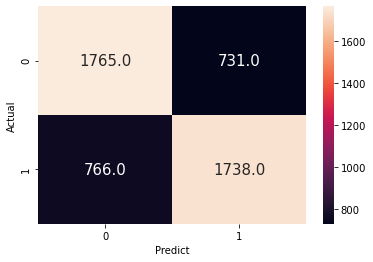

In [83]:
cm = confusion_matrix(test_target,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [84]:
xg = XGBClassifier(use_label_encoder=False,eval_metric = 'mlogloss')
rfc = RandomForestClassifier()
vot = VotingClassifier(estimators=[('xg',xg),('rfc',rfc)],voting='soft')
vot.fit(scaled_train,full_train_target)

VotingClassifier(estimators=[('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            eval_metric='mlogloss', gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
             

In [85]:
y_pred = vot.predict(scaled_test)

In [86]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      2496
           1       0.71      0.71      0.71      2504

    accuracy                           0.71      5000
   macro avg       0.71      0.71      0.71      5000
weighted avg       0.71      0.71      0.71      5000



In [87]:
metrics.accuracy_score(test_target,y_pred)

0.7084

Text(33.0, 0.5, 'Actual')

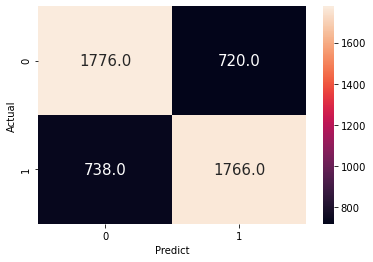

In [88]:
cm = confusion_matrix(test_target,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

The color features helped us to improve the accuracy by 2.18%

In [89]:
km = KMeans(n_clusters = 2, random_state=0)
km.fit(full_train_data)
y_labels_train = km.labels_
y_labels_test = km.predict(test_data)

In [90]:
full_train_data_km = full_train_data.copy()
full_train_data_km['KMeans'] = y_labels_train
full_train_data_km.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_2343,pixel_2344,pixel_2345,pixel_2346,pixel_2347,pixel_2348,pixel_2349,pixel_2350,pixel_2351,KMeans
0,222,231,191,211,223,186,208,224,190,150,...,202,208,155,205,210,160,205,209,160,1
1,55,80,77,63,104,97,27,58,72,6,...,70,98,123,6,21,35,29,57,98,0
2,115,93,76,117,95,79,109,90,76,99,...,123,138,153,50,70,111,62,68,90,0
3,137,149,155,119,130,136,137,147,157,132,...,186,189,194,193,197,203,189,192,197,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [91]:
test_data_km = test_data.copy()
test_data_km['KMeans'] = y_labels_test

In [92]:
xg = XGBClassifier(use_label_encoder=False,eval_metric = 'mlogloss')
rfc = RandomForestClassifier()
pipe_rfc = Pipeline(steps=[('sc',sc), ('rfc', rfc)])
pipe_xg =  Pipeline(steps=[('sc',sc), ('xg', xg)])
vot = VotingClassifier(estimators=[('xg',pipe_xg),('rfc',pipe_rfc)],voting='soft')
vot.fit(full_train_data_km,full_train_target)

VotingClassifier(estimators=[('xg',
                              Pipeline(steps=[('sc', StandardScaler()),
                                              ('xg',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             eval_metric='mlogloss',
                                                             gamma=None,
                                                             gpu_id=None,
                                                             importance_type='gain',
                                                             interaction_constraints=None,
                         

In [93]:
y_pred = vot.predict(test_data_km)

In [94]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      2496
           1       0.71      0.70      0.71      2504

    accuracy                           0.71      5000
   macro avg       0.71      0.71      0.71      5000
weighted avg       0.71      0.71      0.71      5000



In [95]:
metrics.accuracy_score(test_target,y_pred)

0.706

Text(33.0, 0.5, 'Actual')

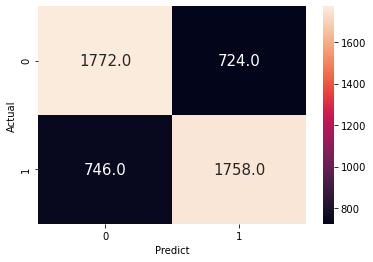

In [96]:
cm = confusion_matrix(test_target,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

### PCA

In [99]:
pca = PCA()
pca.fit(scaled_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.9) + 1

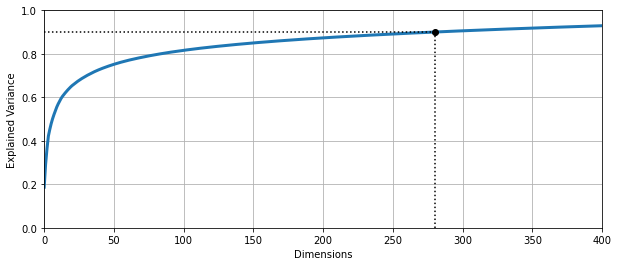

In [100]:
plt.figure(figsize=(10,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.9], "k:")
plt.plot([0, d], [0.9, 0.9], "k:")
plt.plot(d, 0.9, "ko")
plt.grid(True)
plt.show()

In [130]:
pca =PCA(n_components=0.9)

In [131]:
redueced_train = pca.fit_transform(scaled_train)
redueced_train.shape

(40000, 280)

In [132]:
redueced_test = pca.transform(scaled_test)
redueced_test.shape

(5000, 280)

In [133]:
sc = StandardScaler()
rfc = RandomForestClassifier()
xg = XGBClassifier(use_label_encoder=False,eval_metric = 'mlogloss')
pipe_rfc = Pipeline(steps=[('sc',sc),('pca', pca), ('rfc', rfc)])
pipe_xg =  Pipeline(steps=[('sc',sc),('pca', pca), ('xg', xg)])
vot = VotingClassifier(estimators=[('xg',pipe_xg),('rfc',pipe_rfc)],voting='soft')

In [134]:
vot.fit(full_train_data,full_train_target)

VotingClassifier(estimators=[('xg',
                              Pipeline(steps=[('sc', StandardScaler()),
                                              ('pca', PCA(n_components=0.9)),
                                              ('xg',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             eval_metric='mlogloss',
                                                             gamma=None,
                                                             gpu_id=None,
                                                             importance_type='gain',
                                      

In [135]:
y_pred = vot.predict(test_data)

In [136]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.67      0.67      2496
           1       0.67      0.66      0.66      2504

    accuracy                           0.67      5000
   macro avg       0.67      0.67      0.67      5000
weighted avg       0.67      0.67      0.67      5000



In [137]:
metrics.accuracy_score(test_target,y_pred)

0.666

Text(33.0, 0.5, 'Actual')

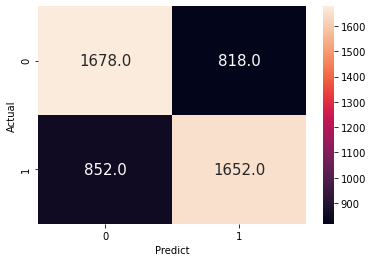

In [138]:
cm = confusion_matrix(test_target,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

In [146]:
x = pd.DataFrame(redueced_train)
y = pd.DataFrame(redueced_test)
x['KMeans'] = y_labels_train
y['KMeans'] = y_labels_test

In [147]:
vot.fit(x,full_train_target)

VotingClassifier(estimators=[('xg',
                              Pipeline(steps=[('sc', StandardScaler()),
                                              ('pca', PCA(n_components=0.9)),
                                              ('xg',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             eval_metric='mlogloss',
                                                             gamma=None,
                                                             gpu_id=None,
                                                             importance_type='gain',
                                      

In [148]:
y_pred = vot.predict(y)

In [149]:
print (classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.62      0.61      2496
           1       0.61      0.60      0.61      2504

    accuracy                           0.61      5000
   macro avg       0.61      0.61      0.61      5000
weighted avg       0.61      0.61      0.61      5000



In [150]:
metrics.accuracy_score(test_target,y_pred)

0.6078

Text(33.0, 0.5, 'Actual')

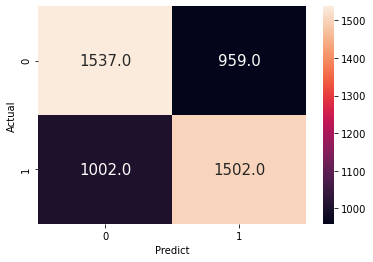

In [151]:
cm = confusion_matrix(test_target,y_pred)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".1f")
plt.xlabel("Predict")
plt.ylabel("Actual")

## summary

#### Gray Scale
with 748 features we reached 68.66 accuracy score and with 220 features we reached 66.92 accuracy score.

#### Colors
with 2352 features we reached 70.84 accuracy score and with 280 features we reached 66.6 accuracy score.